[[-1.23230261  0.23972772]
 [-1.94714609 -0.79823049]
 [-0.10046175 -0.23085659]]
[[-1.19171717  0.03197924]
 [-0.87371196 -1.04449358]
 [-0.10046175 -0.23085658]]
-6.0
[[-2.16530435  1.71564806]
 [-2.28401878  1.01423068]
 [-0.44744416  0.17459199]
 [-0.66966863 -2.62257657]]
[[ 3.11249811e+02  1.85333805e+03]
 [-1.52560842e+00  4.87521284e-01]
 [-1.17435132e+00 -5.81472946e-01]
 [-1.12095405e+00 -1.70007971e+00]]
-4.064625348334608
[[-3.30217749  0.15577055]
 [-0.5136426  -3.2497798 ]
 [-2.01483835  1.59354719]
 [ 0.56941625 -3.39747564]
 [ 1.40420142 -1.91758051]]
[[-2.73427922  0.73202097]
 [ 1.6257683  -3.01795383]
 [-1.99924996  1.58030605]
 [ 2.46793769 -2.27587958]
 [ 1.40419031 -1.91757408]]
-8.001939015141314
[[-1.71975272  0.13905331]
 [ 0.95543274 -0.08953482]
 [-0.77251819  0.02426195]
 [ 1.53450705  5.03207715]
 [-0.80887351  1.12541428]
 [ 1.08024355  1.74344558]]
[[-28.32605551   4.18666967]
 [  0.28362472   0.88986932]
 [ -0.46640145   0.05646095]
 [ -0.03552624   1.95

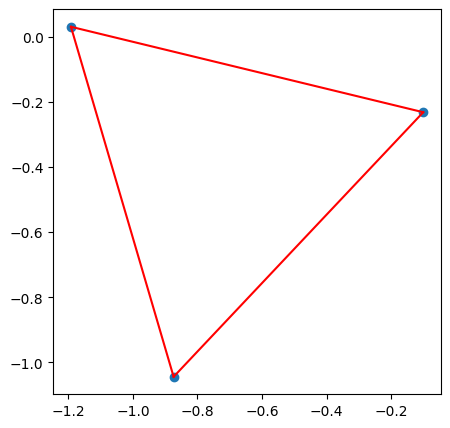

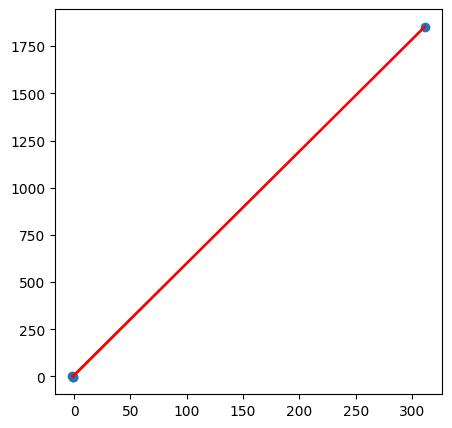

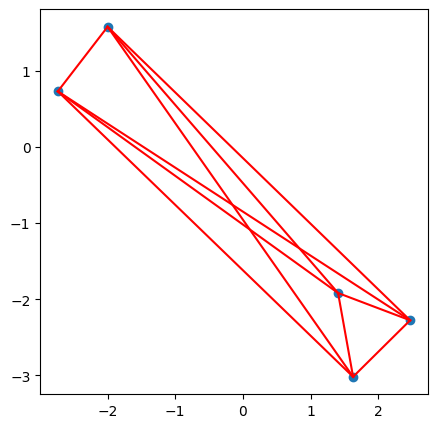

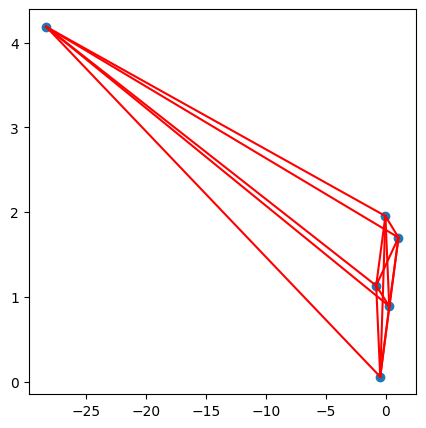

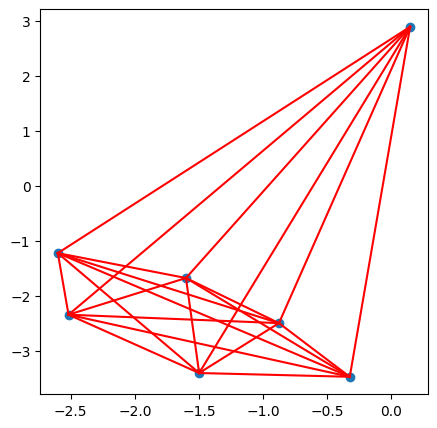

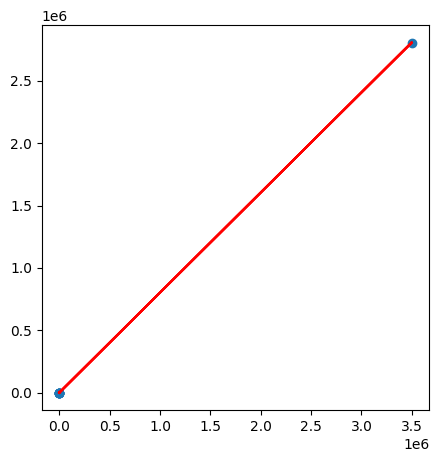

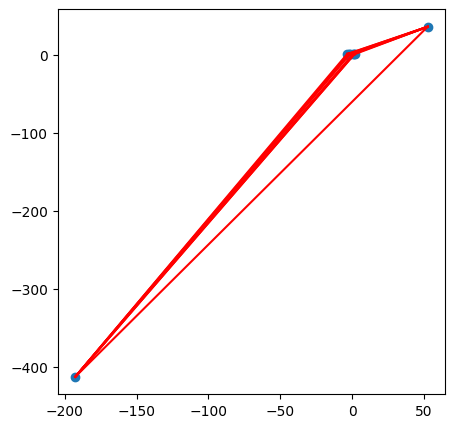

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
import colorcet as cc 
from numpy.linalg import norm

def r(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

def LJ(X):
    m=len(X)
    V0=0
    for i in range(m):
        for j in range(m):
            if(i!=j):
                V0=V0+4*((1/r(X[i],X[j]))**12-(1/r(X[i],X[j]))**6)
    return V0

def grad(a,b):
    grad=np.zeros((2,1))
    grad[0]= 4*((-6)*(a[0]-b[0])*((a[0]-b[0])**2+(a[1]-b[1])**2)**(-7)+(3*(a[0]-b[0])*((a[0]-b[0])**2+(a[1]-b[1])**2)**(-4)))
    grad[1]= 4*((-6)*(a[1]-b[1])*((a[0]-b[0])**2+(a[1]-b[1])**2)**(-7)+(3*(a[1]-b[1])*((a[0]-b[0])**2+(a[1]-b[1])**2)**(-4)))
    return grad

def grad_T(X,i):
    N=len(X)
    gradt=np.zeros((2,1))
    for j in range(N):
        if(i!=j):
            grad0=grad(X[i],X[j])
            gradt[0]+=grad0[0]
            gradt[1]+=grad0[1]
    return gradt


def backTr(alpha, X, i, direction):
    Fn = LJ(X)
    xn=X[i][0]
    yn=X[i][1]
    xn_1 = xn + alpha*direction[0, 0]
    yn_1 = yn + alpha*direction[1, 0]
    X[i][0]=xn_1
    X[i][1]=yn_1
    Fn_1 = LJ(X)
    while Fn < Fn_1:
        alpha = beta*alpha
        xn_1 = xn + alpha*direction[0,0]
        yn_1 = yn + alpha*direction[1, 0]
        X[i][0]=xn_1
        X[i][1]=yn_1
        Fn_1 = LJ(X)
    return alpha

def steepDesc(X,i):
    xn_vec = [X[i][0]]
    yn_vec = [X[i][1]]
    F_vec = [LJ(X)]
    n = 0
    X0=X
    d = -grad_T(X0,i)
    xn,yn=X[i][0],X[i][1]
    while( norm(d) >= tol and n < maxIter ):
        alpha = backTr(alpha0,X0,i,d)
        xn,yn = xn + alpha*d[0,0], yn + alpha*d[1,0]
        xn_vec.append(xn)
        yn_vec.append(yn)
        F_vec.append(LJ(X0))
        X0[i][0],X0[i][1]=xn,yn
        d = -grad_T(X0,i)
        
        n += 1
    return X0, xn_vec, yn_vec, F_vec, n



for N in range(3,10):
    X = np.random.randn(N, 2)*2
    print(X)
    maxIter = 1000
    alpha0 = 1
    beta = 0.8
    tol = 1e-12
    while(1):
        for i in range(len(X)):
            X0, xn_vec_S, yn_vec_S, F_vec_S, n = steepDesc(X,i)
        if(norm(np.subtract(X,X0))<1e-6):
            break
    x=[]
    y=[]
    for i in X:
        x.append(i[0])
        y.append(i[1])
    print(X)
    plt.figure(figsize = (5, 5))
    plt.scatter(x, y)
    for i in range(N):
        for j in range(i+1,N):
            plt.plot([X[i][0],X[j][0]], [X[i][1],X[j][1]],'r')
    print(LJ(X))